In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Empleados=r"C:\Users\user\OneDrive\Desktop\Practica\PYTHON\Proyectos_work\Proyecto_operaciones\Empleados_Operaciones.csv"
Tiempos=r"C:\Users\user\OneDrive\Desktop\Practica\PYTHON\Proyectos_work\Proyecto_operaciones\Tiempos_Produccion.csv"

df = pd.read_csv(Empleados)
print(df.head())
print(df.dtypes)

  ID_Empleado                    Nombre        Área   Turno
0        E001  María José Barrios Armas  Producción  Mañana
1        E002    Luisa Borrás Francisco     Calidad  Mañana
2        E003     Marcelino Querol Tomé   Logística  Mañana
3        E004            Nélida Cáceres  Producción   Noche
4        E005      Macario Barros Nieto  Producción   Noche
ID_Empleado    object
Nombre         object
Área           object
Turno          object
dtype: object


In [2]:
df = pd.read_csv(Tiempos)
print(df.head())
print(df.dtypes)

  ID_Empleado       Fecha Hora_Inicio  Hora_Fin  Producción_Total
0        E001  2025-05-16    02:41:02  10:41:02               101
1        E001  2025-06-01    11:20:04  17:20:04                64
2        E001  2025-06-03    16:21:36  00:21:36               121
3        E001  2025-05-30    13:25:43  19:25:43                70
4        E001  2025-05-30    09:56:21  17:56:21               132
ID_Empleado         object
Fecha               object
Hora_Inicio         object
Hora_Fin            object
Producción_Total     int64
dtype: object


In [11]:
df['Hora_Inicio'] = pd.to_datetime(df['Hora_Inicio'])
df['Hora_Fin'] = pd.to_datetime(df['Hora_Fin'])
print(df.head())
print(df.dtypes)


  ID_Empleado       Fecha         Hora_Inicio            Hora_Fin  \
0        E001  2025-05-16 1900-01-01 02:41:02 1900-01-01 10:41:02   
1        E001  2025-06-01 1900-01-01 11:20:04 1900-01-01 17:20:04   
2        E001  2025-06-03 1900-01-01 16:21:36 1900-01-01 00:21:36   
3        E001  2025-05-30 1900-01-01 13:25:43 1900-01-01 19:25:43   
4        E001  2025-05-30 1900-01-01 09:56:21 1900-01-01 17:56:21   

   Producción_Total  Jornada  
0               101     -8.0  
1                64     -6.0  
2               121     16.0  
3                70     -6.0  
4               132     -8.0  
ID_Empleado                 object
Fecha                       object
Hora_Inicio         datetime64[ns]
Hora_Fin            datetime64[ns]
Producción_Total             int64
Jornada                    float64
dtype: object


In [13]:
#CALCULAR DURACION DE LA JORNADA
df['Jornada']= (df['Hora_Fin'] - df['Hora_Inicio']).dt.total_seconds() / 3600
print(df.head())

  ID_Empleado       Fecha         Hora_Inicio            Hora_Fin  \
0        E001  2025-05-16 1900-01-01 02:41:02 1900-01-01 10:41:02   
1        E001  2025-06-01 1900-01-01 11:20:04 1900-01-01 17:20:04   
2        E001  2025-06-03 1900-01-01 16:21:36 1900-01-01 00:21:36   
3        E001  2025-05-30 1900-01-01 13:25:43 1900-01-01 19:25:43   
4        E001  2025-05-30 1900-01-01 09:56:21 1900-01-01 17:56:21   

   Producción_Total  Jornada  
0               101      8.0  
1                64      6.0  
2               121    -16.0  
3                70      6.0  
4               132      8.0  


In [20]:
#filtrar empleados que trabajaron fueron -4 horas O trabajaron más de 12 horas
Fuera_rango = df[(df['Jornada'] < 4) | (df['Jornada'] > 12)]
print(Fuera_rango[['ID_Empleado', 'Hora_Inicio', 'Hora_Fin', 'Jornada']])

     ID_Empleado         Hora_Inicio            Hora_Fin  Jornada
2           E001 1900-01-01 16:21:36 1900-01-01 00:21:36    -16.0
5           E001 1900-01-01 16:13:49 1900-01-01 00:13:49    -16.0
6           E001 1900-01-01 19:05:07 1900-01-01 03:05:07    -16.0
14          E002 1900-01-01 22:08:06 1900-01-01 04:08:06    -18.0
15          E003 1900-01-01 20:02:17 1900-01-01 05:02:17    -15.0
...          ...                 ...                 ...      ...
1525        E198 1900-01-01 18:17:39 1900-01-01 02:17:39    -16.0
1526        E199 1900-01-01 21:18:10 1900-01-01 06:18:10    -15.0
1530        E199 1900-01-01 17:17:16 1900-01-01 00:17:16    -17.0
1533        E200 1900-01-01 19:32:42 1900-01-01 01:32:42    -18.0
1534        E200 1900-01-01 19:24:19 1900-01-01 03:24:19    -16.0

[501 rows x 4 columns]


In [21]:
Fuera_rango.to_csv('empleados_fuera_rango.csv', index=False)

In [22]:
#¿Qué porcentaje de jornadas están fuera de rango?
porcentaje_fuera_rango = (len(Fuera_rango)/ len(df))*100
print(f"Dato: {porcentaje_fuera_rango:.2f}% de jornadas están fueras de rango")

Dato: 32.53% de jornadas están fueras de rango


In [24]:
top5 = df.sort_values(by='Jornada', ascending=False).head(5)
print(top5[['ID_Empleado', 'Hora_Inicio', 'Hora_Fin', 'Jornada']])

     ID_Empleado         Hora_Inicio            Hora_Fin  Jornada
8           E002 1900-01-01 13:26:36 1900-01-01 22:26:36      9.0
1517        E197 1900-01-01 12:20:20 1900-01-01 21:20:20      9.0
1515        E197 1900-01-01 09:09:23 1900-01-01 18:09:23      9.0
432         E060 1900-01-01 00:40:43 1900-01-01 09:40:43      9.0
433         E060 1900-01-01 08:08:36 1900-01-01 17:08:36      9.0


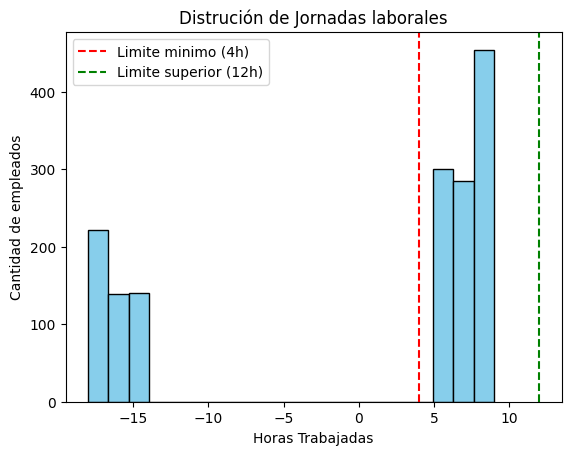

In [29]:
plt.hist(df['Jornada'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(4, color='red', linestyle='--', label='Limite minimo (4h)' )
plt.axvline(12, color='green', linestyle='--', label='Limite superior (12h)')
plt.title('Distrución de Jornadas laborales')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Cantidad de empleados')
plt.legend()
plt.show()